In [6]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt 

In [53]:
x = sym.Symbol('x')

f_ = (x**3) * sympy.cos(x)


In [54]:
def finite_diff(f, x, type="forward", error=0.01, static=True):
 
    if (type == "backward"):
        g = lambda x, h:    (f(x) - f(x-h))/h
    elif (type == "central"):
        g = lambda x, h:    (f(x+h) - f(x-h))/(2*h)
    elif (type == "forward"):
        g = lambda x, h:    (f(x+h) - f(x))/h  
    else:
        print("Není definován typ konečné diference!")
        return

    D = []
    X = []
    x_ = x[0]
    if(not static):
        #Derivace s adaptabilním krokem
        x_ = x[0]
        while x_ < x[-1]:
                
            h1 = error
            h2 = error/2

            dx1 = g(x_, h1)
            dx2 = g(x_, h2)
            
            while(abs(dx1 - dx2)>= error):
                h1 = h2
                h2 = h2/2

                dx1 = g(x_, h1)
                dx2 = g(x_, h2)
            
            D.append(dx2)
            X.append(x_)
            x_ = x_ + h2
    else:
        #Derivace se statickým krokem
        #Za pomocí erroru definuj statický krok
        h = 2*np.sqrt(error)
        #h = (x[-1] - x[0])/len(x)
        for x_ in x:
            dx = g(x_, h)
            D.append(dx)
            X.append(x_)
    
    return D, X

In [55]:
df_ = sym.diff(f_)
f = sym.lambdify(x, f_)
df = sym.lambdify(x, df_)

error = 0.5
x_min = 0
x_max = 10

x_vals = np.linspace(x_min, x_max, 500)

In [56]:
D_adaptive, X_ad = finite_diff(f, x_vals,"central", error, False)
D_static, X_stat = finite_diff(f, x_vals, "central", error, True)

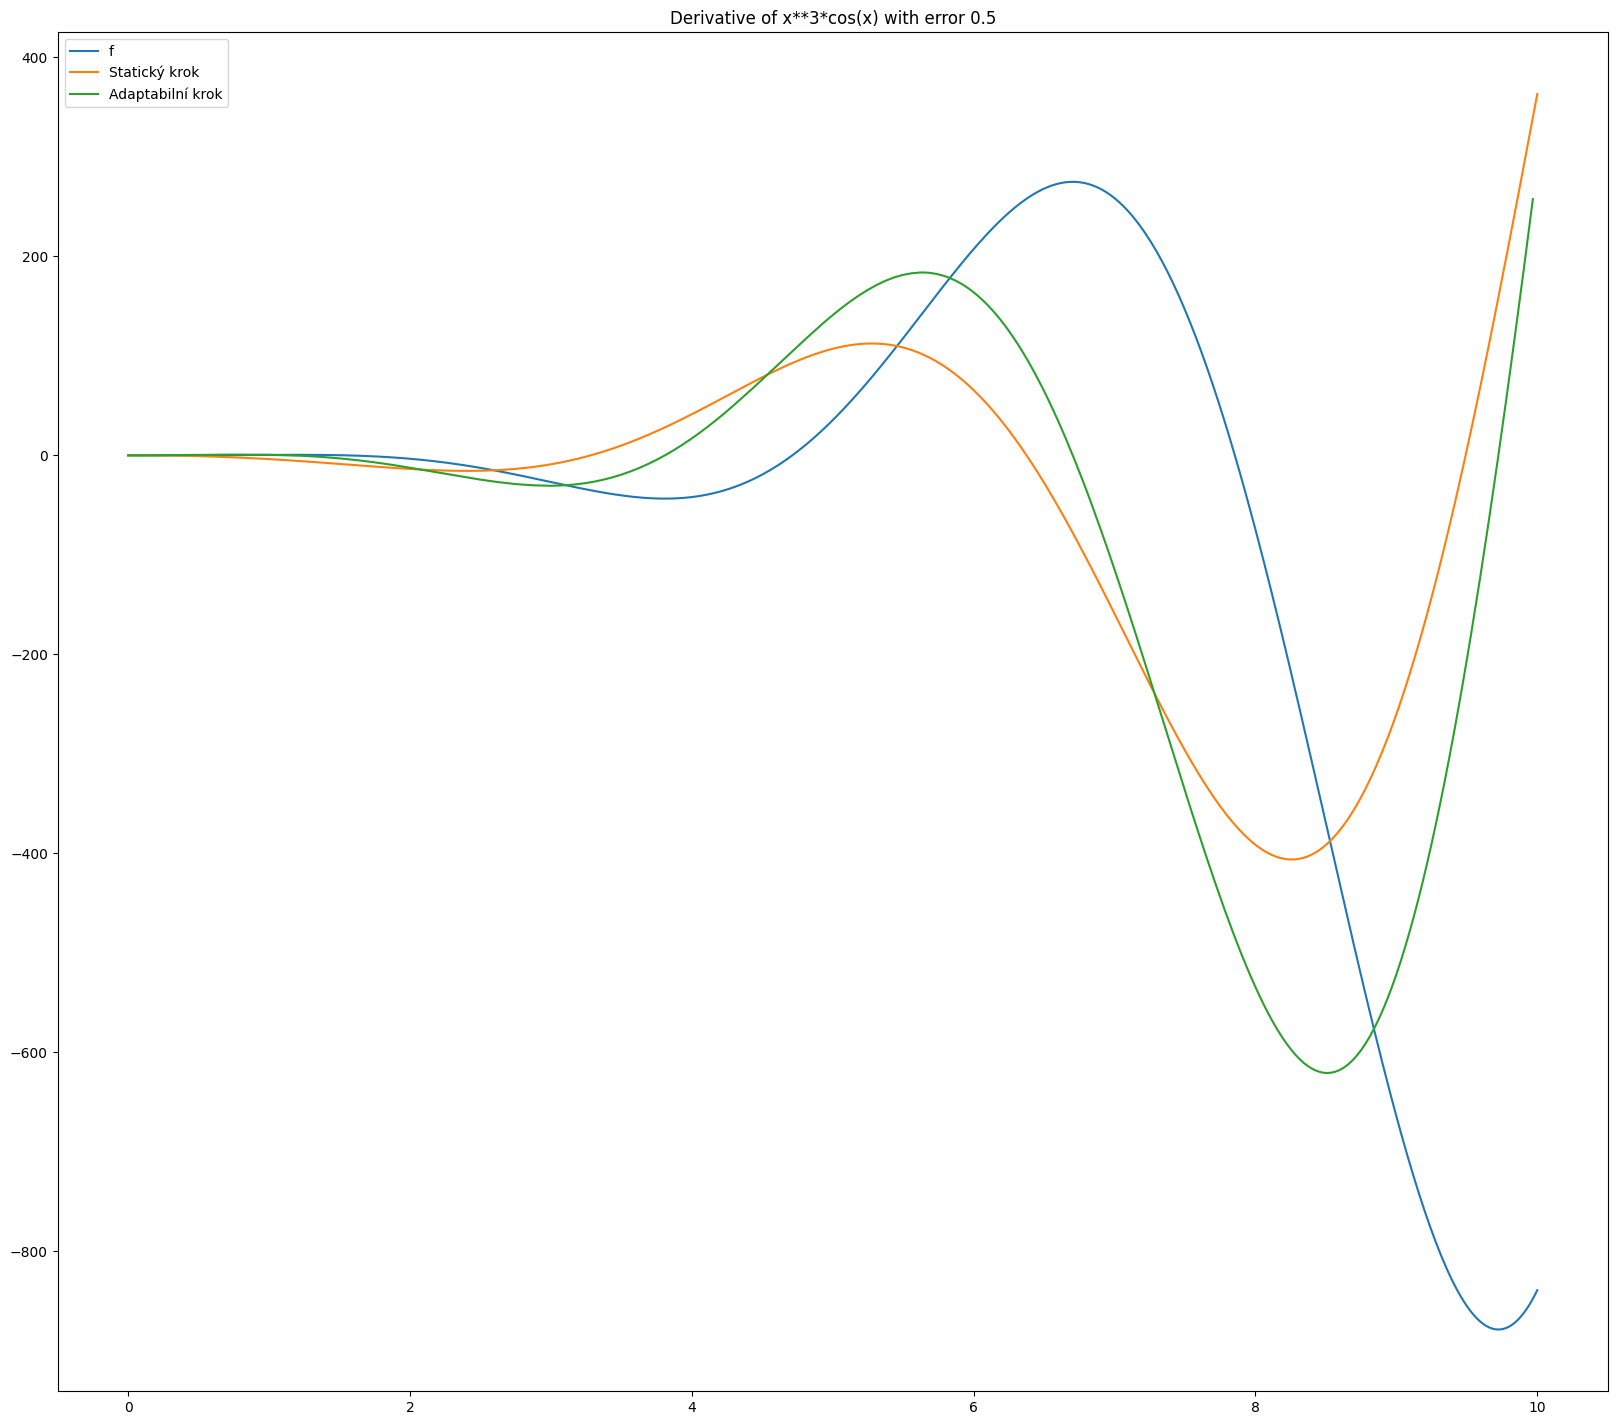

In [57]:
plt.rc('grid', linestyle=':', color='black', linewidth=2)
plt.figure(figsize=(20,18), dpi=100)
plt.title(f"Derivative of {f_} with error {error}")
timeDelay = 0.75

plt.plot(x_vals, f(x_vals), label=f'f')
#plt.pause(timeDelay)

plt.plot(X_stat, D_static, label='Statický krok')
#plt.pause(timeDelay)

plt.plot(X_ad, D_adaptive, label='Adaptabilní krok')
#plt.pause(timeDelay)

#plt.plot(x_vals, df(x_vals), label=f'Vlastní derivace {df_}')
#plt.pause(timeDelay)

# plt.plot()
plt.legend()
plt.show()